## Decision Trees

I'll use decision trees on Breast Cancer dataset and also check the overfitting.

We'll visit different depths and check different train-validation accuracies and plot their bias variance behaviour.

Verify that trees dont need scaling.

I'll also go through the regression version and see how the variance explodes.

I'll also visualize the decision boundary.

I'll also check out different hyperparameters and cost complexity pruning (ccp_alpha) and corresponding feature importances.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [2]:
## training the decision tree classifier with varying depth

train_accuracies = []
test_accuracies = []
depths = range(1, 21)

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)


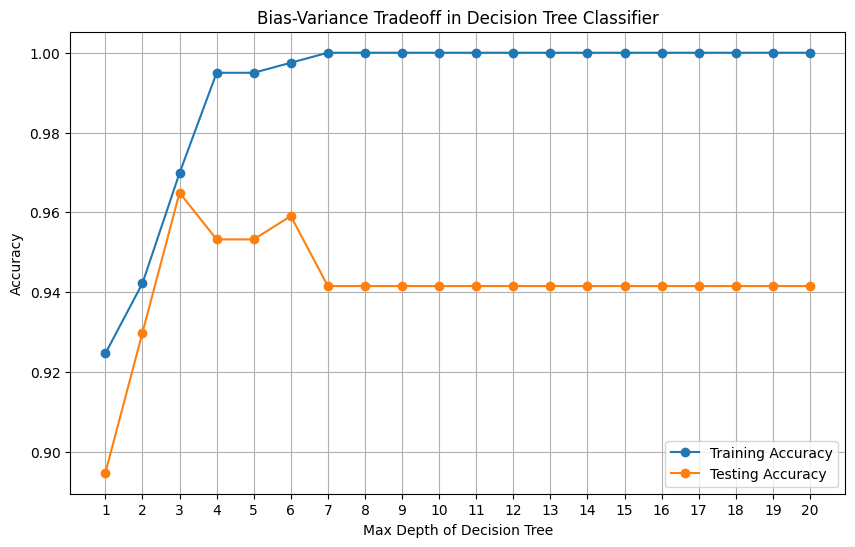

In [3]:
# plotting the bias variance tradeoff

plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Testing Accuracy', marker='o')
plt.title('Bias-Variance Tradeoff in Decision Tree Classifier')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.legend()
plt.grid()
plt.show()


In [4]:
## observations:

#1. for low depths (1-3), both training and testing accuracies are relatively low, indicating high bias (underfitting).
#2. for middle depths (4-10), training accuracy increases significantly while testing accuracy also improves, indicating a good balance between bias and variance.
#3. for high depths (11-20), training accuracy reaches 1.0 (perfect fit), but testing accuracy starts to decline, indicating high variance (overfitting).
#4. the optimal depth for this dataset appears to be around 4-6, where the testing accuracy is maximized without overfitting.

In [5]:
## verifying that trees really dont need scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

train_accuracies_scaled = []
test_accuracies_scaled = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train_scaled, y_train)
    
    y_train_pred_scaled = clf.predict(X_train_scaled)
    y_test_pred_scaled = clf.predict(X_test_scaled)
    
    train_acc_scaled = accuracy_score(y_train, y_train_pred_scaled)
    test_acc_scaled = accuracy_score(y_test, y_test_pred_scaled)
    
    train_accuracies_scaled.append(train_acc_scaled)
    test_accuracies_scaled.append(test_acc_scaled)


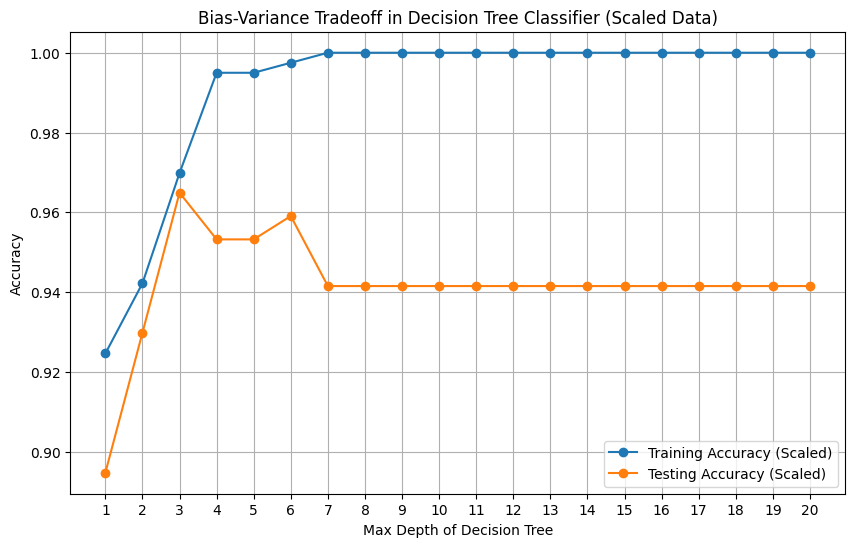

In [6]:
## plotting the bias variance tradeoff for scaled data

plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies_scaled, label='Training Accuracy (Scaled)', marker='o')
plt.plot(depths, test_accuracies_scaled, label='Testing Accuracy (Scaled)', marker='o')
plt.title('Bias-Variance Tradeoff in Decision Tree Classifier (Scaled Data)')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.legend()
plt.grid()
plt.show()

In [7]:
## observation: the accuracies for scaled and unscaled data are identical, confirming that decision trees do not require feature scaling.

In [8]:
## REGRESSION TREES and VARIANCE EXPLOSION

from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X,y = make_regression(n_samples=100, n_features=5, noise=2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)
reg_train_mse = []
reg_val_mse = []

for depth in depths:

    reg = DecisionTreeRegressor(max_depth=depth, random_state=42)
    reg.fit(X_train, y_train)
    
    y_train_pred = reg.predict(X_train)
    y_val_pred = reg.predict(X_val)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    val_mse = mean_squared_error(y_val, y_val_pred)
    
    reg_train_mse.append(train_mse)
    reg_val_mse.append(val_mse)
    

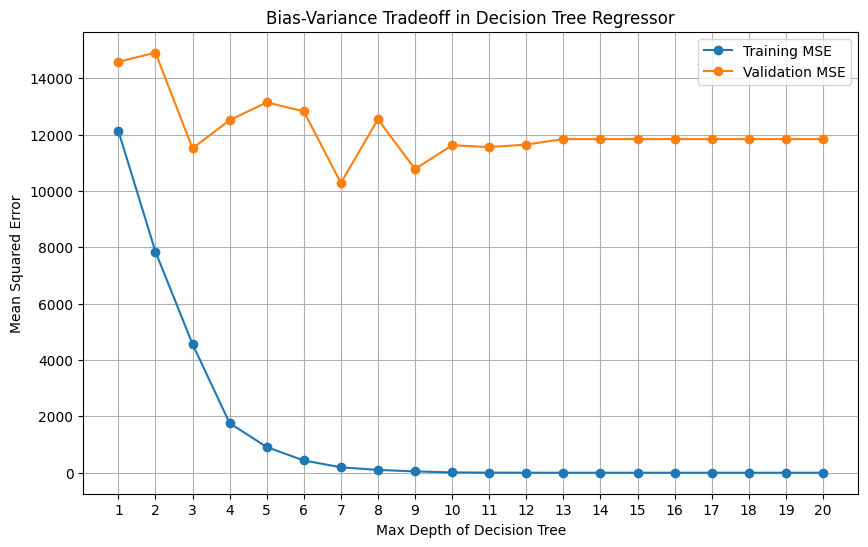

In [9]:
# plotting the train and validation mse for regression trees

plt.figure(figsize=(10, 6))
plt.plot(depths, reg_train_mse, label='Training MSE', marker='o')
plt.plot(depths, reg_val_mse, label='Validation MSE', marker='o')
plt.title('Bias-Variance Tradeoff in Decision Tree Regressor')
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Mean Squared Error')
plt.xticks(depths)
plt.legend()
plt.grid()
plt.show()


In [10]:
## observations:
#1. for low depths (1-3), both training and validation MSE are high, indicating high bias (underfitting).
#2. for middle depths (4-10), training MSE decreases significantly while validation MSE also improves, indicating a good balance between bias and variance.
#3. for high depths (11-20), training MSE approaches 0 (perfect fit), but validation MSE starts to increase, indicating high variance (overfitting).
#3. variance explosion is this increases in validation mse with increasing depth (model starts to become too complex and starts to fit noise)
#4. the optimal depth for this regression dataset appears to be around 4-6, where the validation MSE is minimized without overfitting. 

In [11]:
# visualizing the decision boundary for a 2d dataset

from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier

X, y = make_moons(noise=0.3, random_state=42)

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X, y)

# plot boundary

xx, yy = np.meshgrid(
    np.linspace(X[:,0].min()-1, X[:,0].max()+1, 200),
    np.linspace(X[:,1].min()-1, X[:,1].max()+1, 200)
)

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

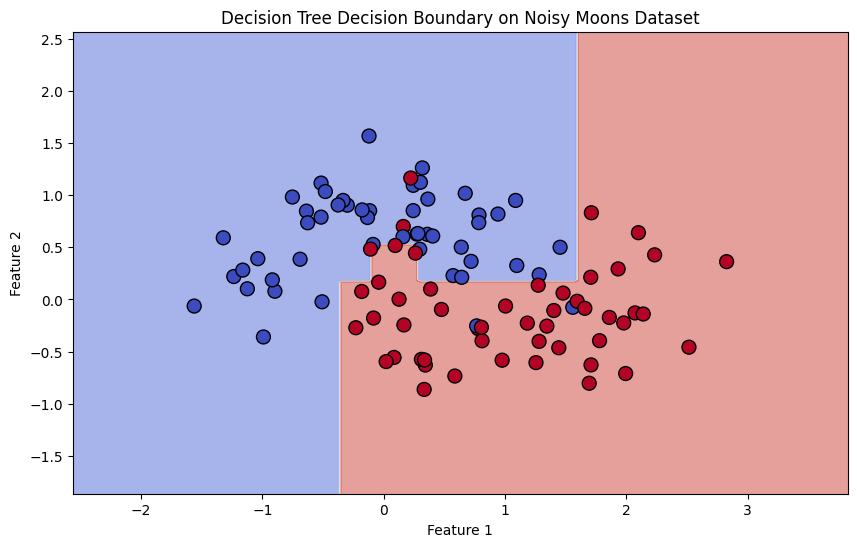

In [12]:
## showcase the plot

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
plt.scatter(X[:,0], X[:,1], c=y, edgecolor='k', marker='o', s=100, cmap='coolwarm')
plt.title('Decision Tree Decision Boundary on Noisy Moons Dataset') 
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [13]:
# checking out hyperparameters - min_samples_leaf

leaf_values = [1,2,5,10,20,50]

train_acc = []
val_acc = []

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

for leaf in leaf_values:

    model = DecisionTreeClassifier(max_depth=None, min_samples_leaf=leaf, random_state=42)
    model.fit(X_train, y_train)

    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    val_acc.append(accuracy_score(y_val, model.predict(X_val)))


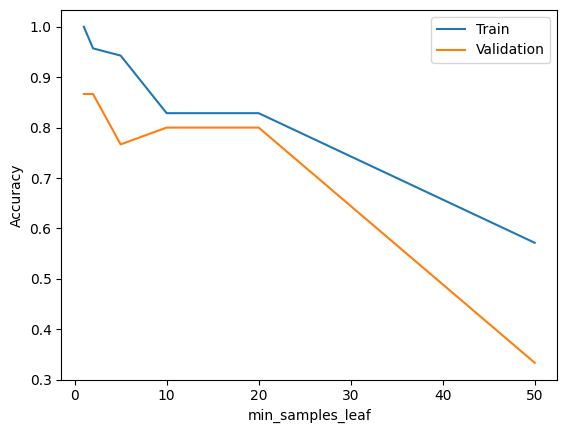

In [14]:
# plotting 

plt.plot(leaf_values, train_acc, label="Train")
plt.plot(leaf_values, val_acc, label="Validation")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [17]:
## observation:
#1. for small leaf values (1-5), training accuracy is very high but validation accuracy is lower, indicating overfitting.
#2. as leaf values increase (10-50), training accuracy decreases but validation accuracy improves, indicating better generalization and reduced overfitting.
#3. for larger leaf values (50+), both training and validation accuracies decrease, indicating underfitting.
#4. the optimal min_samples_leaf value for this dataset appears to be around 10-20, where the validation accuracy is maximized without significant overfitting.

In [18]:
## checking out hyperparameters - min_samples_split

split_values = [2,5,10,20,50,100]

train_acc_split = []
val_acc_split = []

for split in split_values:

    model = DecisionTreeClassifier(max_depth=None, min_samples_split=split, random_state=42)
    model.fit(X_train, y_train)

    train_acc_split.append(accuracy_score(y_train, model.predict(X_train)))
    val_acc_split.append(accuracy_score(y_val, model.predict(X_val)))


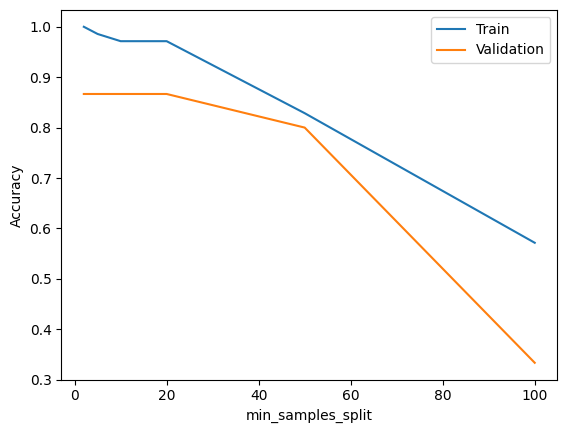

In [19]:
# plotting 

plt.plot(split_values, train_acc_split, label="Train")
plt.plot(split_values, val_acc_split, label="Validation")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()                                                                               
plt.show()


In [20]:
## observation:

#1. for small split values (2-5), training accuracy is very high but validation accuracy is lower, indicating overfitting.
#2. as split values increase (10-50), training accuracy decreases but validation accuracy improves, indicating better generalization and reduced overfitting.
#3. for larger split values (50+), both training and validation accuracies decrease, indicating underfitting.
#4. the optimal min_samples_split value for this dataset appears to be around 10-20, where the validation accuracy is maximized without overfitting.

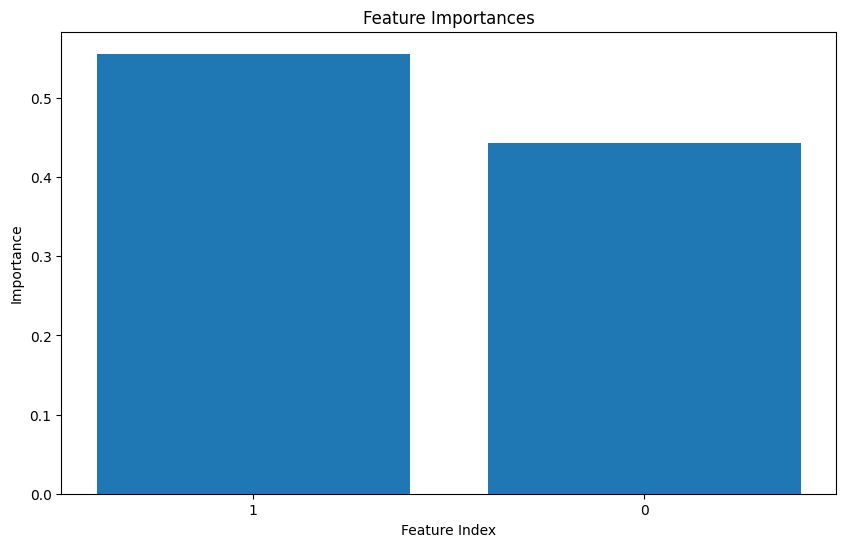

In [25]:
## plotting feature importances 

model = DecisionTreeClassifier(max_depth=None, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")

plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), indices)
plt.xlabel("Feature Index")
plt.ylabel("Importance")
plt.show()

In [26]:
## cost complexity pruning

path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

train_acc_ccp = []
val_acc_ccp = []    

for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    model.fit(X_train, y_train)
    
    train_acc_ccp.append(accuracy_score(y_train, model.predict(X_train)))
    val_acc_ccp.append(accuracy_score(y_val, model.predict(X_val)))

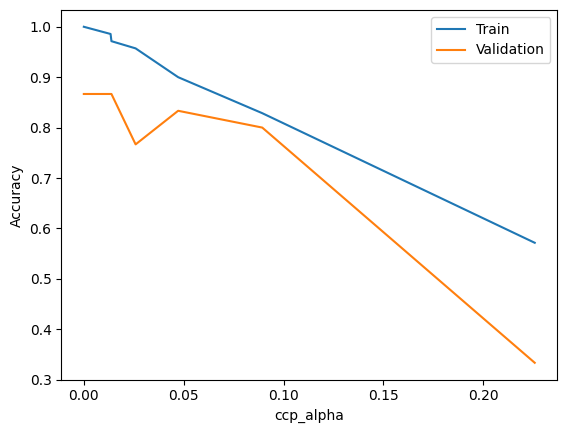

In [27]:
## plotting

plt.plot(ccp_alphas, train_acc_ccp, label="Train")
plt.plot(ccp_alphas, val_acc_ccp, label="Validation")
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [28]:
# observations:
#1. for small ccp_alpha values (0-0.01), training accuracy is very high but validation accuracy is lower, indicating overfitting.
#2. as ccp_alpha increases (0.01-0.1), training accuracy decreases but validation accuracy improves, indicating better generalization and reduced overfitting.
#3. for larger ccp_alpha values (0.1+), both training and validation accuracies decrease, indicating underfitting.
#4. the optimal ccp_alpha value for this dataset appears to be around 0.01-0.1, where the validation accuracy is maximized without overfitting.